## Lab 8 Classification

# Introduction
**Daniel Leskiewicz**
 - Within this lab we apply and interpret appropiate visual and statistical methods to analyze distributions of individual variables and realtionships between the variables, also we learn to setup the dataset correctly and make  evaluations for classification to then use recall, percision, and accuracy to see how effective the model is. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy import stats

## Part 1
### Load, transform, and Clean the Data

In [2]:
headerList = ['ID Number', 'Diagnosis', 'radius mean', 'radius std', 'radius worst', 'texture mean', 'texture std', 'texture worst', 'perimeter mean', 'perimeter std', 'perimeter worst', 'area mean', 'area std', 'area worst', 'smoothness mean', 'smoothness std', 'smoothness worst', 'compactness mean', 'compactness std', 'compactness worst', 'concavity mean', 'concavity std', 'concavity worst', 'concave points mean', 'concave points std', 'concave points worst', 'symmetry mean', 'symmetry std', 'symmetry worst', 'fractal dimension mean', 'fractal dimension std', 'fractal dimension worst']
numerical = ['radius mean', 'radius std', 'radius worst', 'texture mean', 'texture std', 'texture worst', 'perimeter mean', 'perimeter std', 'perimeter worst', 'area mean', 'area std', 'area worst', 'smoothness mean', 'smoothness std', 'smoothness worst', 'compactness mean', 'compactness std', 'compactness worst', 'concavity mean', 'concavity std', 'concavity worst', 'concave points mean', 'concave points std', 'concave points worst', 'symmetry mean', 'symmetry std', 'symmetry worst', 'fractal dimension mean', 'fractal dimension std', 'fractal dimension worst']

In [3]:
data = pd.read_csv("wdbc.data")

In [4]:
data.to_csv('wdbc.data', header=headerList, index=False)

In [5]:
data = pd.read_csv("wdbc.data")

In [6]:
data.head()

,ID Number,Diagnosis,radius mean,radius std,radius worst,texture mean,texture std,texture worst,perimeter mean,perimeter std,...,concavity worst,concave points mean,concave points std,concave points worst,symmetry mean,symmetry std,symmetry worst,fractal dimension mean,fractal dimension std,fractal dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID Number                568 non-null    int64  
 1   Diagnosis                568 non-null    object 
 2   radius mean              568 non-null    float64
 3   radius std               568 non-null    float64
 4   radius worst             568 non-null    float64
 5   texture mean             568 non-null    float64
 6   texture std              568 non-null    float64
 7   texture worst            568 non-null    float64
 8   perimeter mean           568 non-null    float64
 9   perimeter std            568 non-null    float64
 10  perimeter worst          568 non-null    float64
 11  area mean                568 non-null    float64
 12  area std                 568 non-null    float64
 13  area worst               568 non-null    float64
 14  smoothness mean          5

### Part 2 - Characterize each variable. Plot each distribution and describe its range of values

In [8]:
data['Diagnosis'] = data['Diagnosis'].astype("category")

#### Distribution of the outcomes

B    357
M    211
Name: Diagnosis, dtype: int64


Text(0, 0.5, 'Number of Diagnosis')

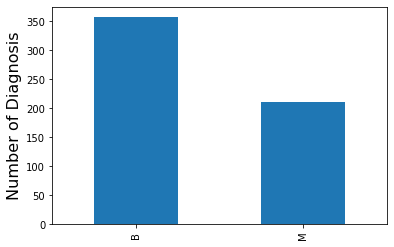

In [9]:
diagnosis = data['Diagnosis'].value_counts()
print(diagnosis)
diagnosis.plot.bar()
plt.ylabel("Number of Diagnosis", fontsize = 16)

#### Boxplot distributions for each variable and type of diagnosis of the tumor

##### Boxplot distribution of Diagnosis and Radius

<AxesSubplot:title={'center':'radius mean'}, xlabel='[Diagnosis]'>

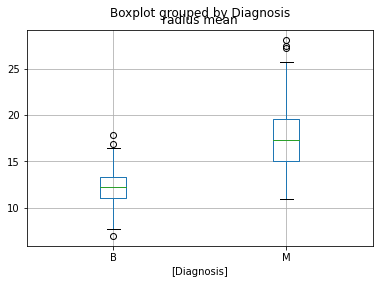

In [10]:
data[['Diagnosis', 'radius mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 10 to a value between 15 and 20, meanwhile for "M" we see that we get values above 10 going beyond 25.

<AxesSubplot:title={'center':'radius std'}, xlabel='[Diagnosis]'>

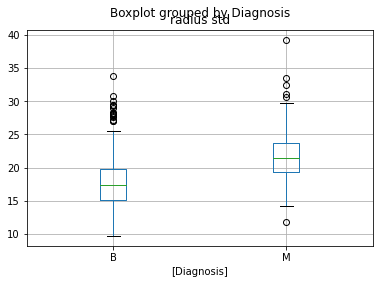

In [11]:
data[['Diagnosis', 'radius std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 10 to a value of 35, meanwhile for "M" we see that we get values above 10 going beyond 40.

<AxesSubplot:title={'center':'radius worst'}, xlabel='[Diagnosis]'>

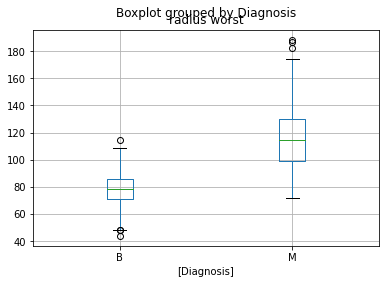

In [12]:
data[['Diagnosis', 'radius worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 50 to a value of 120, meanwhile for "M" we see that we get values above 70 going beyond 180.

##### Boxplot distribution of Diagnosis and Texture

<AxesSubplot:title={'center':'texture mean'}, xlabel='[Diagnosis]'>

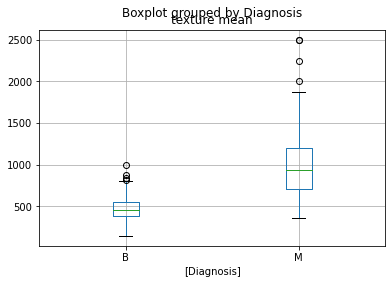

In [13]:
data[['Diagnosis', 'texture mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 500 to a value of 1000, meanwhile for "M" we see that we get values below 500 going beyond 2500.

<AxesSubplot:title={'center':'texture std'}, xlabel='[Diagnosis]'>

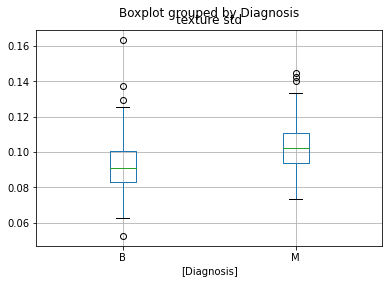

In [14]:
data[['Diagnosis', 'texture std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.06 to a value above 0.16, meanwhile for "M" we see that we get values above 0.06 to 0.15.

<AxesSubplot:title={'center':'texture worst'}, xlabel='[Diagnosis]'>

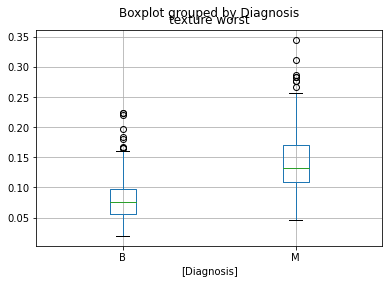

In [15]:
data[['Diagnosis', 'texture worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.05 to a value between 0.20 and 0.25, meanwhile for "M" we see that we get values below 0.05 going beyond 0.35.

##### Boxplot distribution of Diagnosis and Perimeter

<AxesSubplot:title={'center':'perimeter mean'}, xlabel='[Diagnosis]'>

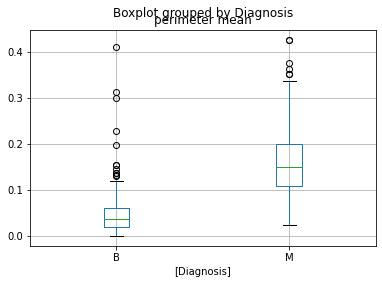

In [16]:
data[['Diagnosis', 'perimeter mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value if 0.0 to a value if 0.4, meanwhile for "M" we see that we get values above 0.0 going beyond 0.4.

<AxesSubplot:title={'center':'perimeter std'}, xlabel='[Diagnosis]'>

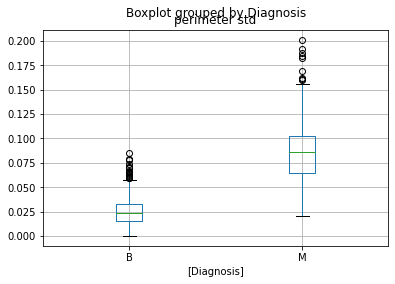

In [17]:
data[['Diagnosis', 'perimeter std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0.00000 to a value between 0.075 and .100, meanwhile for "M" we see that we get values above0.025 going beyond 0.175.

<AxesSubplot:title={'center':'perimeter worst'}, xlabel='[Diagnosis]'>

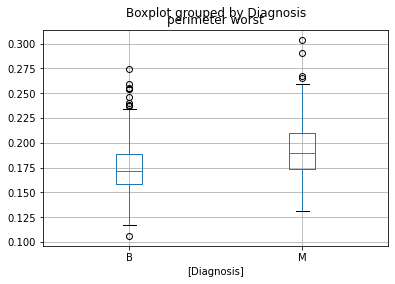

In [18]:
data[['Diagnosis', 'perimeter worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.125 to a value between .250 and .275, meanwhile for "M" we see that we get values above 0.125 going beyond 0.275.

##### Boxplot distribution of Diagnosis and Area

<AxesSubplot:title={'center':'area mean'}, xlabel='[Diagnosis]'>

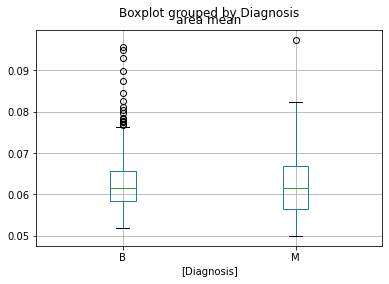

In [19]:
data[['Diagnosis', 'area mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.06 to a value above 0.09, meanwhile for "M" we see that we get values above 0.05 going beyond 0.09.

<AxesSubplot:title={'center':'area std'}, xlabel='[Diagnosis]'>

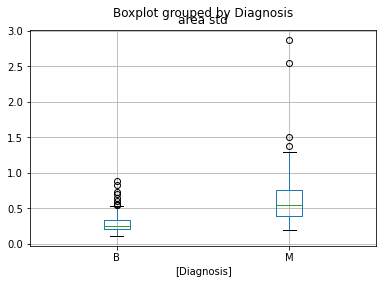

In [20]:
data[['Diagnosis', 'area std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value above 0.00 to a value between 0.5 to 1.0, meanwhile for "M" we see that we get values above 0.0 going beyond 2.5.

<AxesSubplot:title={'center':'area worst'}, xlabel='[Diagnosis]'>

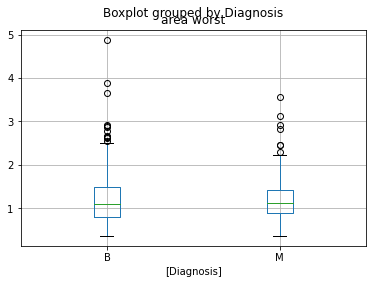

In [21]:
data[['Diagnosis', 'area worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 1 to a value of 5, meanwhile for "M" we see that we get values above 0 going between 3 and 4.

##### Boxplot distribution of Diagnosis and smoothness

<AxesSubplot:title={'center':'smoothness mean'}, xlabel='[Diagnosis]'>

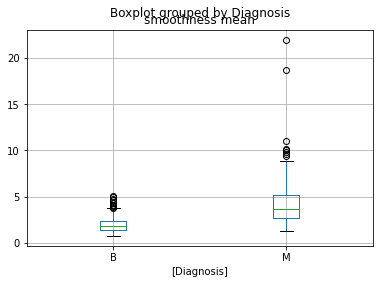

In [22]:
data[['Diagnosis', 'smoothness mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0 to a value of 5, meanwhile for "M" we see that we get values above 0  and going beyond 20.

<AxesSubplot:title={'center':'smoothness std'}, xlabel='[Diagnosis]'>

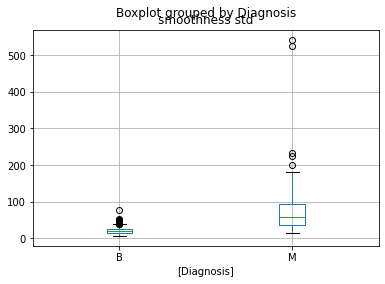

In [23]:
data[['Diagnosis', 'smoothness std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0 to a value between 0 and 100, meanwhile for "M" we see that we get values above 0 going beyond 500.

<AxesSubplot:title={'center':'smoothness worst'}, xlabel='[Diagnosis]'>

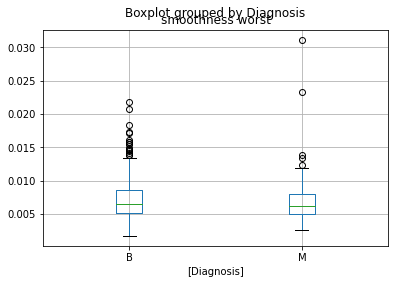

In [24]:
data[['Diagnosis', 'smoothness worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.005 to a value between 0.015 and 0.020, meanwhile for "M" we see that we get values below 0.005 going beyond 0.030.

##### Boxplot distribution of Diagnosis and compactness

<AxesSubplot:title={'center':'compactness mean'}, xlabel='[Diagnosis]'>

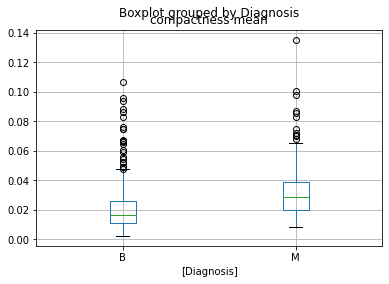

In [25]:
data[['Diagnosis', 'compactness mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value aboe than 0.00 to a value between 0.06 and 0.12, meanwhile for "M" we see that we get values above 0 going beyond 0.12.

<AxesSubplot:title={'center':'compactness std'}, xlabel='[Diagnosis]'>

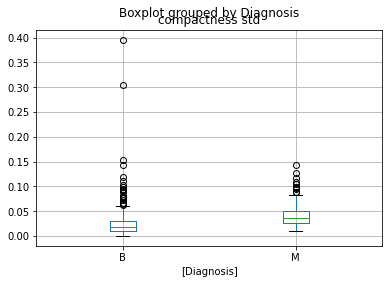

In [26]:
data[['Diagnosis', 'compactness std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0 to a value up to 0.40, meanwhile for "M" we see that we get values above 0 and between 0.05 and 0.15.

<AxesSubplot:title={'center':'compactness worst'}, xlabel='[Diagnosis]'>

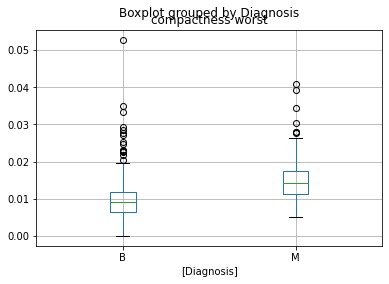

In [27]:
data[['Diagnosis', 'compactness worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0 to a value above 0.05, meanwhile for "M" we see that we get values above 0 going beyond 0.04.

##### Boxplot distribution of Diagnosis and concavity

<AxesSubplot:title={'center':'concavity mean'}, xlabel='[Diagnosis]'>

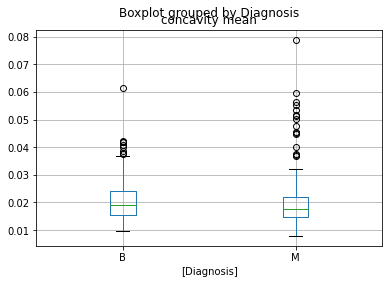

In [28]:
data[['Diagnosis', 'concavity mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value above .010 to a value up to 0.06, meanwhile for "M" we see that we get values below 0.01 going upto 0.08. 

<AxesSubplot:title={'center':'concavity std'}, xlabel='[Diagnosis]'>

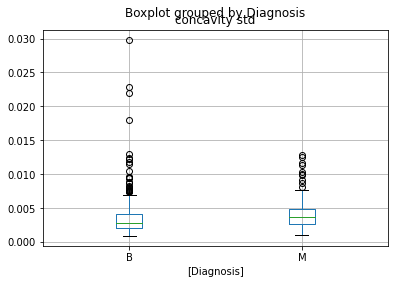

In [29]:
data[['Diagnosis', 'concavity std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.005 to a value between 0.005 to 0.030, meanwhile for "M" we see that we get values above 0.000 going between 0.005 to 0.015.

<AxesSubplot:title={'center':'concavity worst'}, xlabel='[Diagnosis]'>

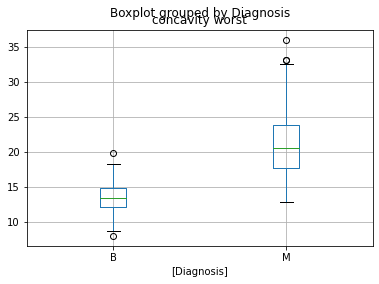

In [30]:
data[['Diagnosis', 'concavity worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 10 to a value upto 20, meanwhile for "M" we see that we get values above 10 going beyond 35.

##### Boxplot distribution of Diagnosis and concave points

<AxesSubplot:title={'center':'concave points mean'}, xlabel='[Diagnosis]'>

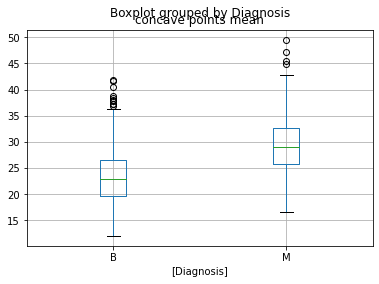

In [31]:
data[['Diagnosis', 'concave points mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 10 to a value between 35 and 45, meanwhile for "M" we see that we get values above 15 going beyond 50.

<AxesSubplot:title={'center':'concave points std'}, xlabel='[Diagnosis]'>

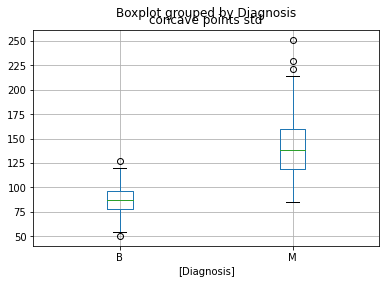

In [32]:
data[['Diagnosis', 'concave points std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 50 to a value upto 125, meanwhile for "M" we see that we get values above 75 going beyond 250.

<AxesSubplot:title={'center':'concave points worst'}, xlabel='[Diagnosis]'>

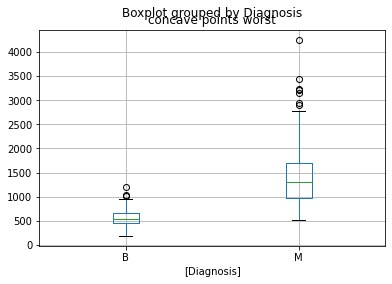

In [33]:
data[['Diagnosis', 'concave points worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 500 to a value between 500 and 1000, meanwhile for "M" we see that we get values of 500 going beyond 4000.

##### Boxplot distribution of Diagnosis and symmetry

<AxesSubplot:title={'center':'symmetry mean'}, xlabel='[Diagnosis]'>

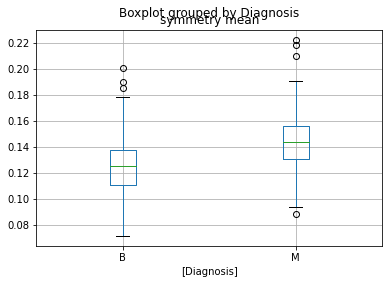

In [34]:
data[['Diagnosis', 'symmetry mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.08 to a value between 0.18 and .20, meanwhile for "M" we see that we get values above 0.08 going beyond 0.22.

<AxesSubplot:title={'center':'symmetry std'}, xlabel='[Diagnosis]'>

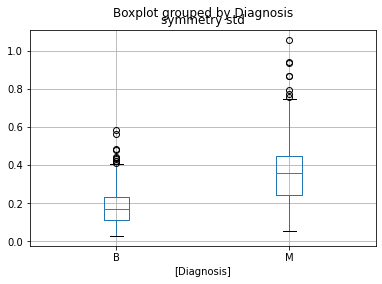

In [35]:
data[['Diagnosis', 'symmetry std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value greater than 0 to a value upto 0.6, meanwhile for "M" we see that we get values above 0 going beyond 1.0.

<AxesSubplot:title={'center':'symmetry worst'}, xlabel='[Diagnosis]'>

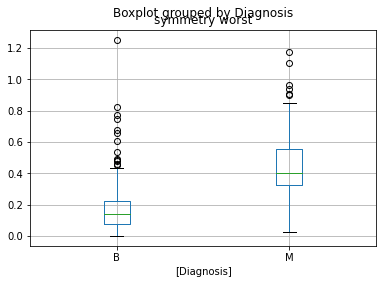

In [36]:
data[['Diagnosis', 'symmetry worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value of 0 to a value above 1.2, meanwhile for "M" we see that we get values above 0 going beyond 1.2.

##### Boxplot distribution of Diagnosis and fractal dimension

<AxesSubplot:title={'center':'fractal dimension mean'}, xlabel='[Diagnosis]'>

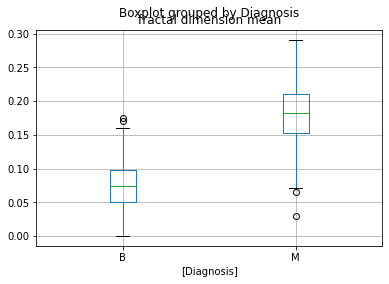

In [37]:
data[['Diagnosis', 'fractal dimension mean']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0 to a value between 0.15 and 0.20, meanwhile for "M" we see that we get values above 0 going beyond 0.25.

<AxesSubplot:title={'center':'fractal dimension std'}, xlabel='[Diagnosis]'>

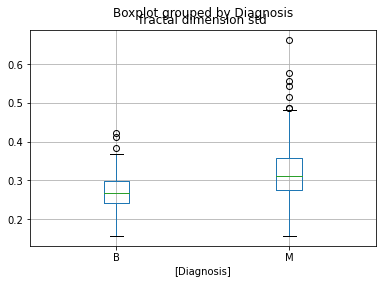

In [38]:
data[['Diagnosis', 'fractal dimension std']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.2 to a value upti 0.5, meanwhile for "M" we see that we get values below 0.2 going beyond 0.6.

<AxesSubplot:title={'center':'fractal dimension worst'}, xlabel='[Diagnosis]'>

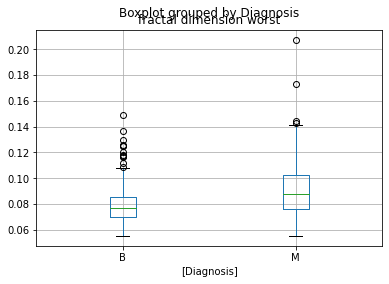

In [39]:
data[['Diagnosis', 'fractal dimension worst']].boxplot(by="Diagnosis")

To start, the ranges for "B" from a value lower than 0.06 to a value between 0.06 and 0.14, meanwhile for "M" we see that we get values above 0 going beyond 0.20.

### Performing statistical tests 

#### Performing the Kruskal Wallis test

In [40]:
for i in numerical:
    samples = []
    for v in set(data[i]):
        mask = data[i] == v
        samples.append(data['Diagnosis'][mask])
    value, p_value = stats.kruskal(*samples)
    print(i, " P Values ", p_value)

radius mean  P Values  0.03355504723259343
radius std  P Values  0.2601005317517219
radius worst  P Values  0.1652705119887749
texture mean  P Values  0.31743274508766833
texture std  P Values  0.627782872442487
texture worst  P Values  0.4238616438402143
perimeter mean  P Values  0.253547128660646
perimeter std  P Values  0.27138551376225417
perimeter worst  P Values  0.4072731142347956
area mean  P Values  0.4984581787762441
area std  P Values  0.29080327036951786
area worst  P Values  0.534491222512779
smoothness mean  P Values  0.23533165863388125
smoothness std  P Values  0.22132089058175913
smoothness worst  P Values  0.3706097840671606
compactness mean  P Values  0.371240578253371
compactness std  P Values  0.2554085821246654
compactness worst  P Values  0.4295217361546782
concavity mean  P Values  0.6201844921946954
concavity std  P Values  0.4602974380019703
concavity worst  P Values  0.005358203616578031
concave points mean  P Values  0.4439058648955475
concave points std  P 

| Variable | p-value | Statistically Significant Relationship at Threshold = 0.05 |
| --- | --- | --- |
|radius mean| 0.03355504723259343|NO|
|radius std| 0.2601005317517219|NO|
|radius worst|0.1652705119887749|NO|
|texture mean|0.31743274508766833|NO|
|texture std| 0.627782872442487|NO|
|texture worst| 0.4238616438402143|NO|
|perimeter mean| 0.253547128660646|NO|
|perimeter std | 0.27138551376225417|NO|
|perimeter worst|0.4072731142347956|NO|
|area mean|0.4984581787762441|NO|
|area std| 0.29080327036951786|NO|
|area worst|0.534491222512779|NO|
|smoothness mean| 0.23533165863388125|NO|
|smoothness std|0.22132089058175913|NO|
|smoothness worst|0.3706097840671606|NO|
|compactness mean|0.371240578253371|NO|
|compactness std|0.2554085821246654|NO|
|compactness worst|0.4295217361546782|NO|
|concavity mean|  0.6201844921946954|NO|
|concavity std| 0.4602974380019703|NO|
|concavity worst|0.005358203616578031|YES|
|concave points mean| 0.4439058648955475|NO|
|concave points std|0.2500437574733715|NO|
|concave points worst|0.32595294669815894|NO|
|symmetry mean|0.2523623145325174|NO| 
|symmetry std| 0.27129131999074113|NO|
|symmetry worst|0.30238849327325085|NO|
|fractal dimension mean|0.04528637046478485|YES|
|fractal dimension std|0.43942395635544546|NO| 
|fractal dimension worst|0.5292088942337989|NO|


## Part 4

In [41]:
categorical_columns = ["Diagnosis"]
dummy_columns = {}
for col_name in categorical_columns:
    dummies = pd.get_dummies(data[col_name], prefix=col_name)
    dummy_columns[col_name] = dummies.columns.values
    data = data.merge(dummies, left_index=True, right_index=True)

#### Experimental Setup

In [42]:
data_train, data_test = train_test_split(data, stratify=data['Diagnosis'])

#### Scaling the training and testing sets

Using the labelEncoder to transform the Diagnosis from strings to integers and store an internal representation

In [43]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(data_train["Diagnosis"].astype("str"))
y_test = encoder.transform(data_test["Diagnosis"].astype("str"))

### Base Line Model For Logistic Regression

In [44]:
zeros_train = np.zeros(data_train.shape)
zeros_test = np.zeros(data_test.shape)

baseline = SGDClassifier(max_iter=10000, loss="log")
baseline.fit(zeros_train, y_train)
pred_null_labels = baseline.predict(zeros_test)
pred_prob = baseline.predict_proba(zeros_test)

baseline_accuracy = accuracy_score(y_test, pred_null_labels)
null_loss = log_loss(y_test, pred_prob)
cm = confusion_matrix(y_test, pred_null_labels)
recall_baseline = recall_score(y_test, pred_null_labels)
percision_baseline = precision_score(y_test, pred_null_labels)

print("Accuracy:", baseline_accuracy)
print("Loss:", null_loss)
print("Recall: ", recall_baseline)
print("Percision:", percision_baseline)
print("Labels:", encoder.classes_)
print("Confusion matrix:")
print(cm)

Accuracy: 0.3732394366197183
Loss: 0.7120523716643975
Recall:  1.0
Percision: 0.3732394366197183
Labels: ['B' 'M']
Confusion matrix:
[[ 0 89]
 [ 0 53]]


In [45]:
X_train = data_train[["radius mean"]].astype("float64").values
X_test = data_test[["radius mean"]].astype("float64").values

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

simple_lr = SGDClassifier(max_iter=10000, loss="log")
simple_lr.fit(X_train, y_train)
pred_labels = simple_lr.predict(X_test)
pred_prob = simple_lr.predict_proba(X_test)

baseline_accuracy = accuracy_score(y_test, pred_labels)
loss = log_loss(y_test, pred_prob)
cm = confusion_matrix(y_test, pred_labels)

print("Accuracy:", baseline_accuracy)
print("Loss:", null_loss)
print("Labels:", encoder.classes_)
print("Confusion matrix:")
print(cm)

Accuracy: 0.8309859154929577
Loss: 0.7120523716643975
Labels: ['B' 'M']
Confusion matrix:
[[73 16]
 [ 8 45]]


### Feature Selection with Greedy Algorithm

In [46]:
numerical_columns = ['radius mean', 'radius std', 'radius worst', 'texture mean', 'texture std', 'texture worst', 'perimeter mean', 'perimeter std', 'perimeter worst', 'area mean', 'area std', 'area worst', 'smoothness mean', 'smoothness std', 'smoothness worst', 'compactness mean', 'compactness std', 'compactness worst', 'concavity mean', 'concavity std', 'concavity worst', 'concave points mean', 'concave points std', 'concave points worst', 'symmetry mean', 'symmetry std', 'symmetry worst', 'fractal dimension mean', 'fractal dimension std', 'fractal dimension worst']
categorical_columns = ['Diagnosis']
candidate_columns = numerical_columns

In [47]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = SimpleImputer()
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

In [48]:
print("baseline Model Accuracy:", baseline_accuracy)

column_accuracies = []

for col_name in candidate_columns:
    X_train, X_test = create_feature_matrices(data_train,
                                             data_test,
                                             [col_name],
                                             dummy_columns)
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(X_train, y_train)
    pred_labels = simple_lr.predict(X_test)
    pred_probs = simple_lr.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    print()
    print(col_name + " Accuracy:", simple_accuracy)
    print(col_name + " Loss:", simple_loss)
    column_accuracies.append((simple_accuracy, col_name))
    
column_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col_name for _, col_name in column_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

baseline Model Accuracy: 0.8309859154929577

radius mean Accuracy: 0.8732394366197183
radius mean Loss: 0.36017252141224115

radius std Accuracy: 0.7183098591549296
radius std Loss: 0.5513822775317127

radius worst Accuracy: 0.8380281690140845
radius worst Loss: 0.3406014952965509

texture mean Accuracy: 0.8873239436619719
texture mean Loss: 0.3546961097002055

texture std Accuracy: 0.6971830985915493
texture std Loss: 0.5943324282259611

texture worst Accuracy: 0.7535211267605634
texture worst Loss: 0.592243087555428

perimeter mean Accuracy: 0.8802816901408451
perimeter mean Loss: 0.37680353777392356

perimeter std Accuracy: 0.9084507042253521
perimeter std Loss: 0.21665912328072778

perimeter worst Accuracy: 0.6830985915492958
perimeter worst Loss: 0.7020119873267738

area mean Accuracy: 0.6267605633802817
area mean Loss: 0.6752628751078548

area std Accuracy: 0.8098591549295775
area std Loss: 0.4376781938978827

area worst Accuracy: 0.4788732394366197
area worst Loss: 0.76458288628

In [49]:
base_model_columns = []
base_loss = null_loss
base_accuracy = baseline_accuracy

print("Base Model Accuracy:", base_accuracy)
print("Base Model Loss:", base_loss)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(data_train,
                                             data_test,
                                             trial_columns,
                                             dummy_columns)
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
    print(str(trial_columns) + " Model Loss:", trial_loss)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_loss = trial_loss
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Loss:", base_loss)
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))


Base Model Accuracy: 0.8309859154929577
Base Model Loss: 0.7120523716643975


['perimeter std'] Model Accuracy: 0.9084507042253521
['perimeter std'] Model Loss: 0.2345957465106409
Updating base model

Base Model Loss: 0.2345957465106409
Base Model Accuracy: 0.9084507042253521


['perimeter std', 'concavity worst'] Model Accuracy: 0.9154929577464789
['perimeter std', 'concavity worst'] Model Loss: 0.2209864330115537
Updating base model

Base Model Loss: 0.2209864330115537
Base Model Accuracy: 0.9154929577464789


['perimeter std', 'concavity worst', 'concave points std'] Model Accuracy: 0.9154929577464789
['perimeter std', 'concavity worst', 'concave points std'] Model Loss: 0.18380767047221785

Base Model Loss: 0.2209864330115537
Base Model Accuracy: 0.9154929577464789


['perimeter std', 'concavity worst', 'texture mean'] Model Accuracy: 0.9366197183098591
['perimeter std', 'concavity worst', 'texture mean'] Model Loss: 0.15140329980909456
Updating base model

Base Model Loss: 0.15140


Model MSE: 0.06338028169014084
Model RMSE: 0.25175440748900674

Model Accuracy: 0.9366197183098591
Labels: ['B' 'M']
Recall: 0.9245283018867925
Percision: 0.9074074074074074

Confusion matrix:
[[84  5]
 [ 4 49]]


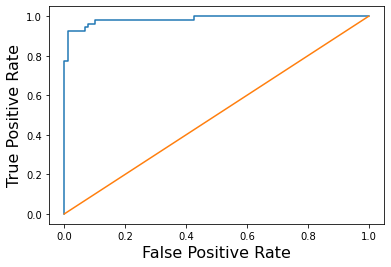

In [50]:
X_train, X_test = create_feature_matrices(data_train,
                                          data_test,
                                          base_model_columns,
                                          dummy_columns)
    
lr = SGDClassifier(max_iter=10000, loss="log")
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
pred_prob = lr.predict_proba(X_test)

trial_accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)
recall_greedy = recall_score(y_test, pred_labels)
percision_greedy = precision_score(y_test, pred_labels)

#ROC Curve for the best features 
pred_prob_1 = 1.0 - pred_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

mse = mean_squared_error(y_test, pred_labels)
rmse = np.sqrt(mse)
print()
print("Model MSE:", mse)
print("Model RMSE:", rmse)
print()
print("Model Accuracy:", trial_accuracy)
print("Labels:", encoder.classes_)
print("Recall:", recall_greedy)
print("Percision:", percision_greedy)
print()
print("Confusion matrix:")
print(cm)

### All Variable Model

In [51]:
X_train_all, X_test_all = create_feature_matrices(data_train, data_test, numerical_columns, dummy_columns)
print(X_train)

all_variables_model = SGDClassifier(max_iter=5000, loss="log")
all_variables_model.fit(X_train_all, y_train)
pred_mpg_values = all_variables_model.predict(X_test_all)
pred_mpg_values_prob = all_variables_model.predict_proba(X_test_all)

trial_accuracy = accuracy_score(y_test, pred_mpg_values)
cm = confusion_matrix(y_test, pred_mpg_values)
recall_all_variable = recall_score(y_test, pred_mpg_values)
percision_all_variable = precision_score(y_test, pred_mpg_values)
print()
print("Model Accuracy:", trial_accuracy)
print("Labels:", encoder.classes_)
print("Recall:", recall_all_variable)
print("Percision:", percision_all_variable)
print("Confusion matrix:")
print(cm)

[[ 0.11462913 -1.26430589 -1.1876158  -1.04064118 -0.15246585]
 [-0.50584326 -0.27822047 -0.33807629 -0.33375429 -0.12187993]
 [ 0.38761615  0.05474344  0.01163021 -0.11187137 -0.02553429]
 ...
 [-0.81920526 -1.21521506 -1.09665679 -0.97549956 -0.61553664]
 [-0.22061351 -1.05086749 -0.96536967 -0.87605368 -0.22984822]
 [-0.57773678 -0.79687579 -0.76814463 -0.71511557 -0.41366958]]

Model Accuracy: 0.9577464788732394
Labels: ['B' 'M']
Recall: 0.9622641509433962
Percision: 0.9272727272727272
Confusion matrix:
[[85  4]
 [ 2 51]]


## Evaluation of the Models

Text(0, 0.5, 'True Positive Rate')

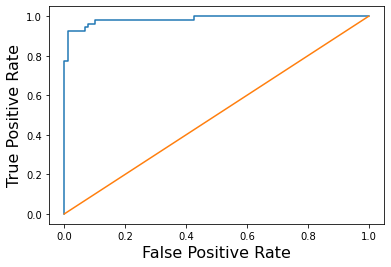

In [52]:
#baseline ROC
# turn multiclass problem into binary problem
pred_null_labels_1 = 1.0 - pred_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_labels_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

Text(0, 0.5, 'True Positive Rate')

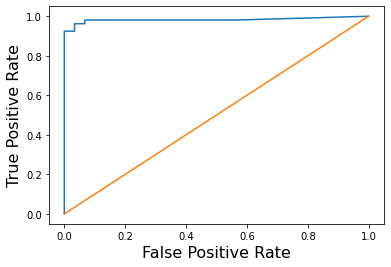

In [53]:
#All Variable Model ROC 
pred_mpg_values_1 = 1.0 - pred_mpg_values_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_mpg_values_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

In [54]:
#baseline RMSE and MSE Calculation
mse = mean_squared_error(y_test, pred_null_labels)
rmse = np.sqrt(mse)
print()
print("Model MSE:", mse)
print("Model RMSE:", rmse)


Model MSE: 0.6267605633802817
Model RMSE: 0.7916821100544598


In [55]:
#All Variable RMSE and MSE Calculation
mse = mean_squared_error(y_test, pred_mpg_values)
rmse = np.sqrt(mse)
print()
print("Model MSE:", mse)
print("Model RMSE:", rmse)


Model MSE: 0.04225352112676056
Model RMSE: 0.2055566129482595


a) The model that had the loweset RMSE is the is the all variable model. The model that had the highest RMSE is the baseline model


b) Well the baseline is prone to having issues with having False Negatives because of the way we are creating matrices of zeros and using those as apart of fitting and testing so I'm not surprised on the confusion matrix that it produced. Meanwhile, I expected the greedy and the all variable model to better, the greedy confusion matrix it got 3 False Negatives and 2 False Positives, meanwhile the all variables model got 1 False Negative and 3 False Positive which results in very similar model accuracies. These models are prone to making false positives and false negatives mistakes especially the baseline model. 

c) Assuming that we were creating a model to be used for diagnosing patients in a clinical setting, we would want false positives because depending on the disease we can give them the drugs for the disease while getting tested frequently to make sure that they do have the disease meanwhile if we use false negative then that would mean that they don't have the disease so we aren't treating the patient and they might be in greater risk because of it. 

## Conclusion

- Within this lab, we use classifaction and we get practice with creating the baseline, greedy, and all variable models. With these models, we evaluate them by percision, accuracy, and recall and we also create ROC curves to see how many true positives to false positives occur for each model. We then calculate MSE and RMSE which shows the absolute fit of the model to the data, so how close the observed data points are to the model's predicted values